In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [55]:
np.random.seed(12345)

df = pd.DataFrame([np.random.normal(32000,200000,3650), 
                   np.random.normal(43000,100000,3650), 
                   np.random.normal(43500,140000,3650), 
                   np.random.normal(48000,70000,3650)], 
                  index=[1992,1993,1994,1995])
df.head()

,0,1,2,3,4,5,6,7,8,9,...,3640,3641,3642,3643,3644,3645,3646,3647,3648,3649
1992,-8941.531897,127788.667612,-71887.743011,-79146.060869,425156.114501,310681.166595,50581.575349,88349.230566,185804.513522,281286.947277,...,171938.760289,150650.759924,203663.976475,-377877.158072,-197214.093861,24185.008589,-56826.729535,-67319.766489,113377.299342,-4494.878538
1993,-51896.094813,198350.518755,-123518.252821,-129916.759685,216119.147314,49845.883728,149135.648505,62807.672113,23365.577348,-109686.264981,...,-44566.520071,101032.122475,117648.199945,160475.622607,-13759.888342,-37333.493572,103019.841174,179746.127403,13455.493990,34442.898855
1994,152336.932066,192947.128056,389950.263156,-93006.152024,100818.575896,5529.230706,-32989.370488,223942.967178,-66721.580898,47826.269111,...,165085.806360,74735.174090,107329.726875,199250.734156,-36792.202754,-71861.846997,26375.113219,-29328.078384,65858.761714,-91542.001049
1995,-69708.439062,-13289.977022,-30178.390991,55052.181256,152883.621657,12930.835194,63700.461932,64148.489835,-29316.268556,59645.677367,...,-13901.388118,50173.686673,53965.990717,4128.990173,72202.595138,39937.199964,139472.114293,59386.186379,73362.229590,28705.082908


In [56]:
df = df.T
df.describe()

,1992,1993,1994,1995
count,3650.000000,3650.000000,3650.000000,3650.000000
mean,33312.107476,41861.859541,39493.304941,47743.550969
std,200630.901553,98398.356203,140369.925240,69781.185469
min,-717071.175466,-321586.023683,-450827.613097,-189865.963265
25%,-102740.398364,-26628.302213,-57436.397393,1774.555612
50%,29674.931050,43001.976658,41396.781369,49404.322978
75%,167441.838695,108296.577923,137261.713785,94164.333867
max,817505.608159,395586.505068,490091.665037,320826.888044


In [136]:
# formula for the confidence interval using Z-scores
## CONF = MEAN +- t* (Std/ sqrt(N))
# t-score for 95% = 1.962

# considering the yerr function we need to specify the SIZE of the error, not %s
## the size is the lenght of ONE side of the error

cnfintsiz_92 = ( 1.962 * (np.std(df[1992]) / math.sqrt(len(df[1992]))))
cnfintsiz_93 = ( 1.962 * (np.std(df[1993]) / math.sqrt(len(df[1993]))))
cnfintsiz_94 = ( 1.962 * (np.std(df[1994]) / math.sqrt(len(df[1994]))))
cnfintsiz_95 = ( 1.962 * (np.std(df[1995]) / math.sqrt(len(df[1995]))))

conf_intvls = [cnfintsiz_92, cnfintsiz_93, cnfintsiz_94, cnfintsiz_95]

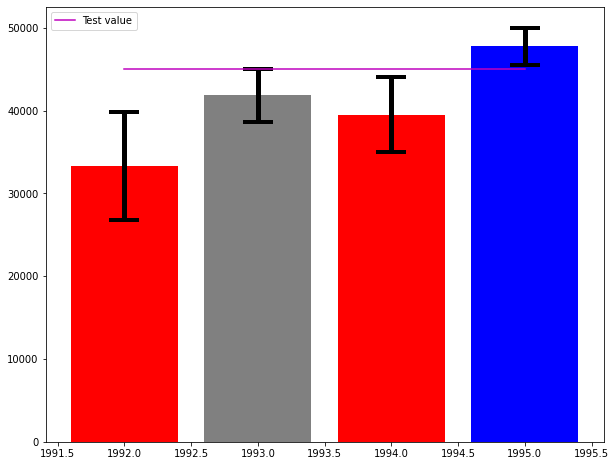

In [159]:
plt.figure(figsize=(10,8))

ytest = 45000

columns = list(df.columns)

for i in range(len(columns)):
    ## calculate range tuple for the confidence interval
    tpl = ( np.mean(df[columns[i]]) + (conf_intvls[i]) , np.mean(df[columns[i]]) - (conf_intvls[i]))
    
    # test if the ytest value falls within range of 
    if ytest <= tpl[0] and ytest >= tpl[1]:
        plt.bar(columns[i], np.mean(df[columns[i]]), color="grey")
    
    elif ytest < tpl[1]:
        plt.bar(columns[i], np.mean(df[columns[i]]), color="blue")
        
    else:
        plt.bar(columns[i], np.mean(df[columns[i]]), color="red")

#plotting errorbars
    ## this follows a simialr schema to that of bars, but only plots the error bars
plt.errorbar(df.columns[0], np.mean(df[1992]), color="black", yerr= cnfintsiz_92, elinewidth=5, capsize=15, capthick=4)
plt.errorbar(df.columns[1], np.mean(df[1993]), color="black", yerr= cnfintsiz_93, elinewidth=5, capsize=15, capthick=4)
plt.errorbar(df.columns[2], np.mean(df[1994]), color="black", yerr= cnfintsiz_94, elinewidth=5, capsize=15, capthick=4)
plt.errorbar(df.columns[3], np.mean(df[1995]), color="black", yerr= cnfintsiz_95, elinewidth=5, capsize=15, capthick=4)

plt.plot(list(df.columns), [ytest]*4, 'm-', label="Test value")

plt.legend()

plt.savefig("Assignment3.jpg")